In [111]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import plotnine as gg
from plotnine import *
from mpl_toolkits.mplot3d import Axes3D
from pylab import *


# Principle Component Analysis

In [122]:
path = '/Users/habbasi/Desktop/2018_11_20_Batch1'
file = os.path.join(path, 'C-7210-01-CMP-008-gray_collapsed_new1.csv')

# Importing data 



df = pd.read_csv(file)



#Merging of dataframes (Platemap with compound information + old data)
# df = data2.merge(data1, on = ['Metadata_broad_sample'])
# filtered_A549 = (df.Metadata_Plate == 'BR00100032') | (df.Metadata_cell_line == 'A549')
# data = df[filtered_A549]
# data.head()

# data = pd.merge(data1, data2, on=['Metadata_broad_sample'], how='inner')
# data.head()

#Parsing Metadata columns
metadata_columns = data.columns.str.contains("Metadata")
df_metadata = data.loc[:, metadata_columns]
df_var = data.loc[:, ~metadata_columns].values
x = df_var
y = data.Metadata_compound_name.values
y_df = pd.DataFrame(data[['Metadata_label','Metadata_compound_name']])


In [123]:
pca = PCA(n_components=2)
x_r = pca.fit(x).transform(x)
test = pd.DataFrame(x_r, columns= ['PC1', 'PC2'])

# # Setup plotting logic
combined = test.merge(y_df, left_index=True, right_index=True)
combined.head()



# var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
# var

,PC1,PC2,Metadata_label,Metadata_compound_name
0,1.450113,4.522529,DMSO,DMSO
1,3.165549,-1.079923,DMSO,DMSO
2,2.233484,0.647082,DMSO,DMSO
3,-4.184643,1.180527,DMSO,DMSO
4,-5.301592,4.906095,DMSO,DMSO


/Users/habbasi/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/Users/habbasi/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: /Users/habbasi/Desktop/Gray_project_PCA.pdf
  warn('Filename: {}'.format(filename))


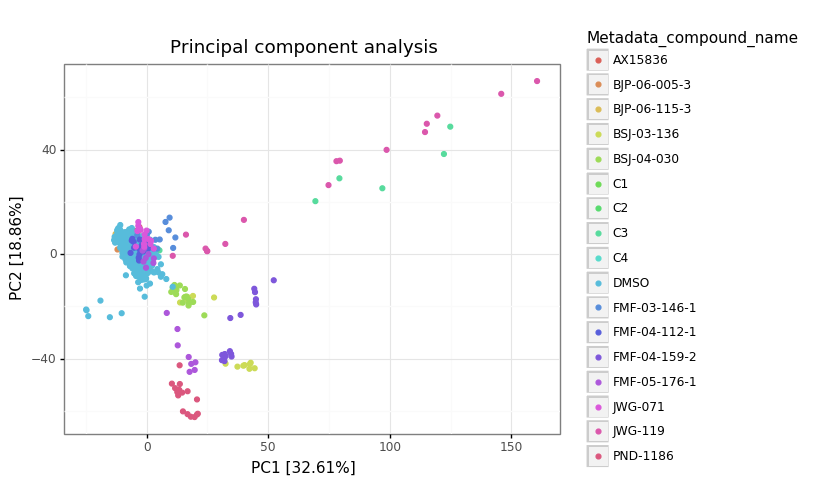

<ggplot: (-9223372029306238099)>

In [124]:
p = gg.ggplot(combined, gg.aes(x='PC1', y='PC2', color='Metadata_compound_name', label='Metadata_compound_name')) + \
    gg.geom_point() + \
    gg.theme_bw() + \
    gg.xlab("PC1 [32.61%]") + \
    gg.ylab("PC2 [18.86%]") + \
    gg.ggtitle("Principal component analysis")
ggsave(filename='Gray_project_PCA.pdf', plot = p, path = '/Users/habbasi/Desktop/')
    #gg.ggtitle("Principle component analysis") + \
#     gg.scale_color_manual(name="CellLine", values=["#1b9e77", "#d95f02", "#7570b3"]) + \
#     gg.scale_shape_manual(name="Batch", labels=[1, 2], values=['o', '+']) + \
#     gg.scale_size_manual(name="Dosage", values=[2, 3, 4, 5]) + \
#     gg.theme(legend_key=gg.element_rect(color="black", fill = "white"))

p

In [152]:
# Clustering analysis for BR00100032 and A549
path = '/Users/habbasi/Desktop/2018_11_20_Batch1'
file = os.path.join(path, 'C-7210-01-CMP-008-gray_collapsed_new1.csv')
df = pd.read_csv(file)

filtered_A549 = (df.Metadata_Plate == 'BR00100032') 
data = df[filtered_A549]

# # # #Parsing Metadata columns
metadata_columns = data.columns.str.contains("Metadata")
df_metadata = data.loc[:, metadata_columns]
df_var = data.loc[:, ~metadata_columns].values
x = df_var
y = data.Metadata_compound_name.values
y_df = pd.DataFrame(df[['Metadata_Annotation','Metadata_compound_name']])


# # # ## PCA analysis
pca = PCA(n_components=2)
x_r = pca.fit(x).transform(x)

# # # var=(np.round(pca.explained_variance_ratio_, decimals=3)*100)
# # # var
test = pd.DataFrame(x_r, columns= ['PC1', 'PC2'])

# # # # # # # Setup plotting logic
combined = test.merge(y_df, left_index=True, right_index=True)
filtered = (combined. Metadata_compound_name== 'PND-1186').count() 
filtered

# # # #Plotting Figure

# # p = gg.ggplot(combined, gg.aes(x='PC1', y='PC2', color='Metadata_compound_name', label='Metadata_compound_name')) + \
# #     gg.geom_point() + \
# #     gg.theme_bw() + \
# #     gg.xlab("PC1 [42%]") + \
# #     gg.ylab("PC2 [21%]") + \
# #     gg.ggtitle("Principal component analysis")
# # ggsave(filename='Gray_project_PCA.pdf', plot = p, path = '/Users/habbasi/Desktop/')

# # p



384